<a href="https://colab.research.google.com/github/jomscan/CEIABDTA/blob/main/SNS_ACT3_4_JonathanMartinSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonathan Martin Sanchez

In [1]:
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    #df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=',')
    return df

In [3]:
df = upload_files()
df.head()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
User uploaded file "WA_Fn-UseC_-Telco-Customer-Churn.csv" with length 977501 bytes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
import numpy as np


# Visualización inicial
print(df.head())
print(df.info())

# Eliminar la columna 'customerID'
df.drop('customerID', axis=1, inplace=True)

# Conversión de TotalCharges a numérico:
# Algunos valores pueden estar en blanco, se convierten en NaN y se imputan (por ejemplo, con la mediana)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Cantidad de valores faltantes en TotalCharges:", df['TotalCharges'].isnull().sum())

# Imputar los valores faltantes en TotalCharges con la mediana
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Revisar que no queden valores faltantes
print(df.isnull().sum())

# Conversión de la variable objetivo 'Churn' a binaria (Sí -> 1, No -> 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Codificar variables categóricas (aplicando one-hot encoding)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.columns)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<ipython-input-4-9ef199b11e97>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


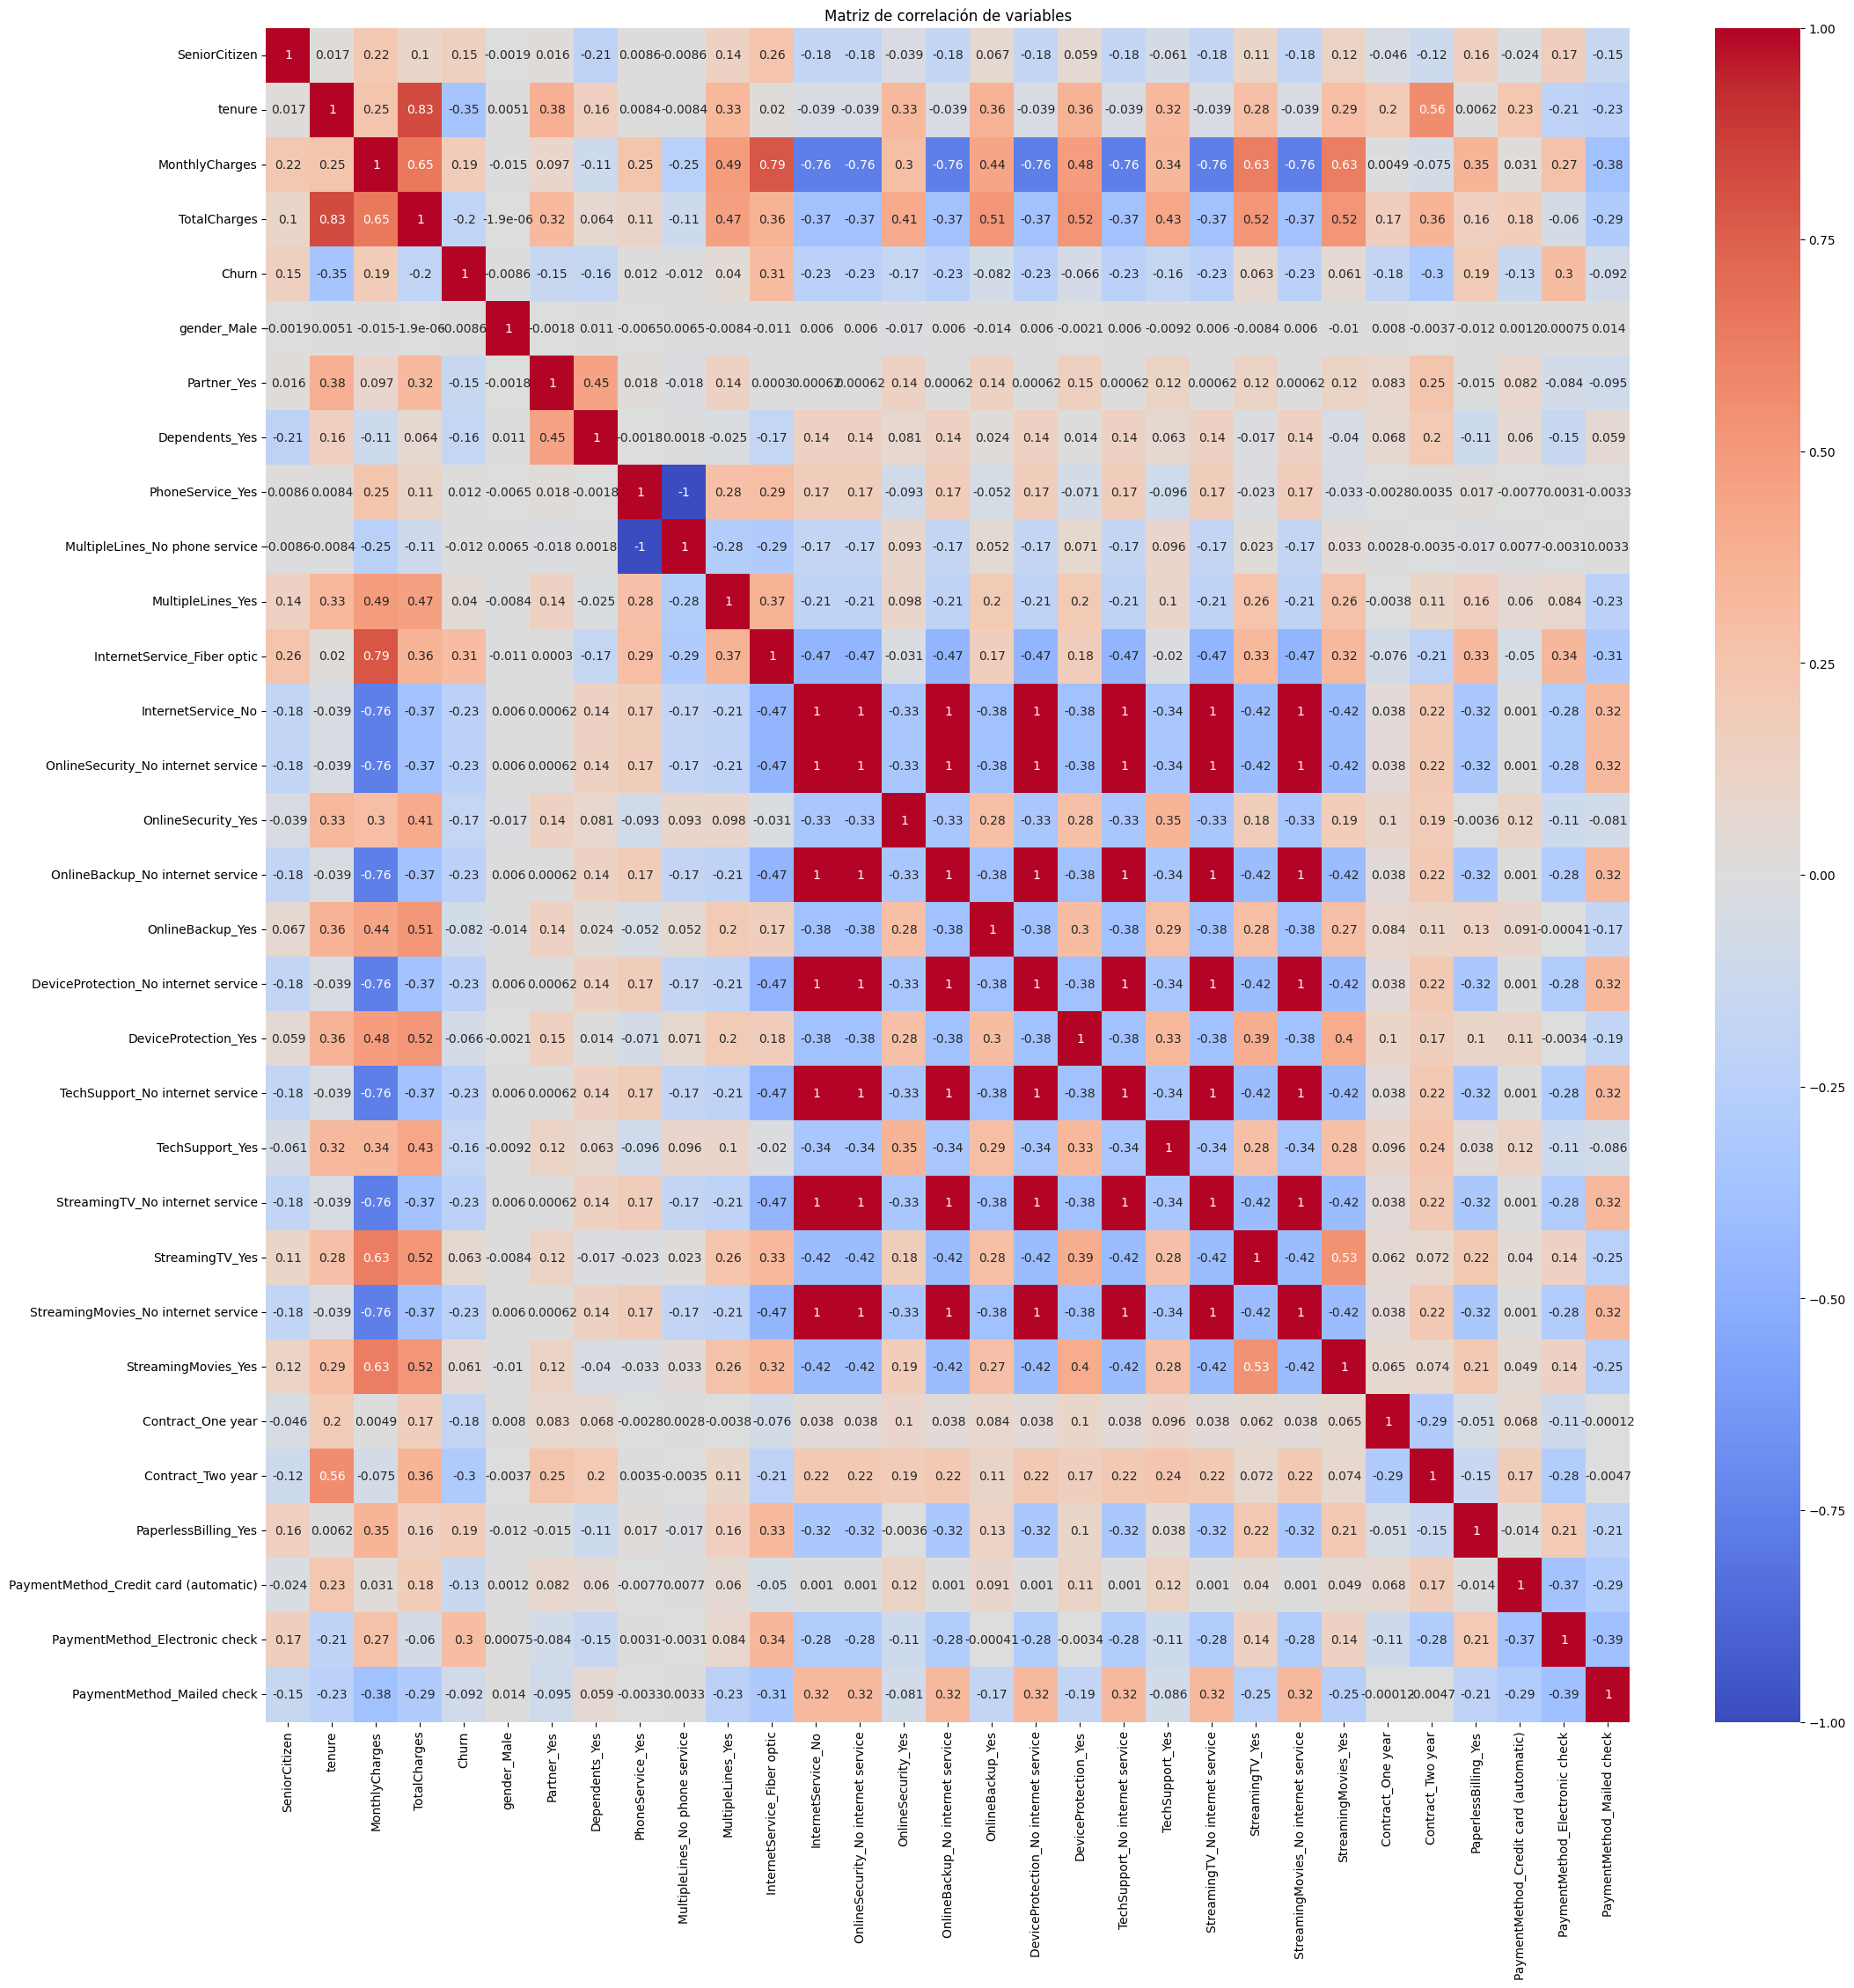

In [5]:
plt.figure(figsize=(25, 25))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de variables")
plt.show()

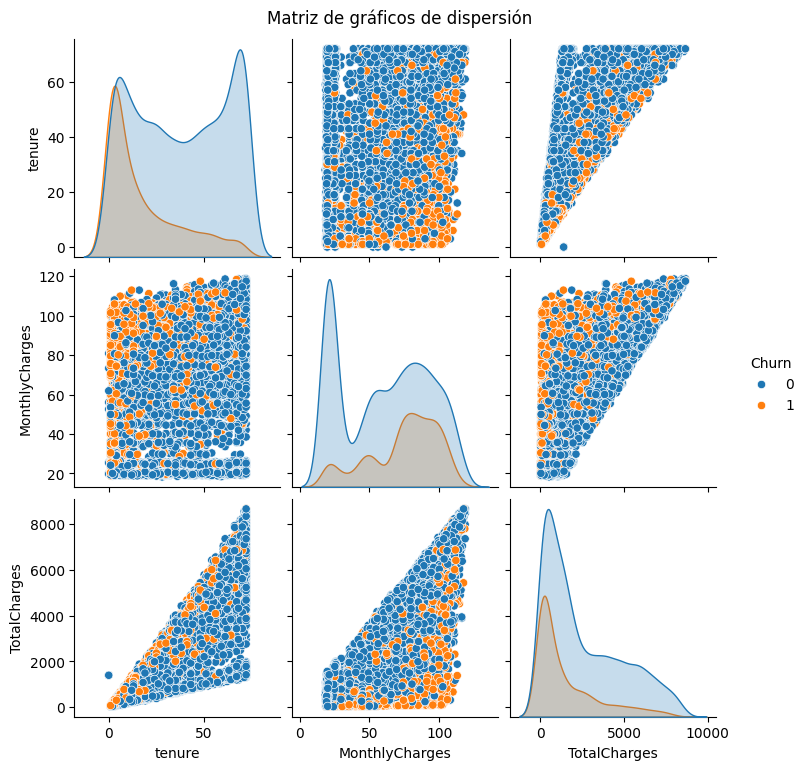

In [7]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
sns.pairplot(df[selected_features], hue='Churn')
plt.suptitle("Matriz de gráficos de dispersión", y=1.02)
plt.show()


In [12]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Separar variables predictoras y la variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Debido a que algunos atributos pueden tener valores negativos o no ser enteros, se usa f_classif
selector = SelectKBest(score_func=f_classif, k=10)  # Seleccionamos las 10 mejores características
X_new = selector.fit_transform(X, y)

# Obtener el listado de columnas seleccionadas
mask = selector.get_support()  # Boolean mask
selected_features = X.columns[mask]
print("Características seleccionadas con SelectKBest:", selected_features.tolist())


Características seleccionadas con SelectKBest: ['tenure', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report

# Usar las características seleccionadas previamente
X_selected = X[selected_features]

# Dividir en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

# Modelos de Naive Bayes a evaluar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB()
}

# Bucle para entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Predecir en el conjunto de prueba

    # Evaluación
    print(f"\nModelo: {name}")
    print("Exactitud (sin CV):", accuracy_score(y_test, y_pred))
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))


Modelo: GaussianNB
Exactitud (sin CV): 0.5825840037860861
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.46      0.62      1552
           1       0.38      0.91      0.54       561

    accuracy                           0.58      2113
   macro avg       0.66      0.69      0.58      2113
weighted avg       0.79      0.58      0.60      2113


Modelo: MultinomialNB
Exactitud (sin CV): 0.7628963558920966
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1552
           1       0.54      0.67      0.60       561

    accuracy                           0.76      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.76      0.77      2113


Modelo: BernoulliNB
Exactitud (sin CV): 0.6909607193563654
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.6

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import classification_report
import numpy as np

# Usar las características seleccionadas previamente
X_selected = X[selected_features]

# Modelos de Naive Bayes a evaluar
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB()
}

# Bucle para entrenar y evaluar cada modelo con Cross Validation
cv = 5  # Número de folds para cross-validation

for name, model in models.items():
    scores = cross_val_score(model, X_selected, y, cv=cv, scoring='accuracy')

    print(f"\nModelo: {name}")
    print(f"Exactitud promedio con CV ({cv}-folds): {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")



Modelo: GaussianNB
Exactitud promedio con CV (5-folds): 0.5878 (+/- 0.0117)

Modelo: MultinomialNB
Exactitud promedio con CV (5-folds): 0.7671 (+/- 0.0064)

Modelo: BernoulliNB
Exactitud promedio con CV (5-folds): 0.6893 (+/- 0.0092)

Modelo: ComplementNB
Exactitud promedio con CV (5-folds): 0.7030 (+/- 0.0147)
